# Part 1

## Imports

In [1]:
!pip install textblob 
import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import re
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rohit Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Handling the Dataset

In this part I have cleaned the dataset by removing unwanted columns, removing punctuation marks in the tweetcaption column and using only relevant words for sentiment analysis.

In [3]:
data = pd.read_csv('F:/MyGithub/public-sentiment-analysis-based-on-twitter-hashtags/datasets/datasets/dataset.csv')
data.head()

,Data,Date,Time,tweetcaption
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


In [7]:
def clean(txt):
# Removing all special characters and numericals leaving the alphabets
    txt = re.sub('[^A-Za-z]+', ' ', txt)
    return txt

# Cleaning the text in the tweetcaption column
data['cleaned_tweetcaption'] = data['tweetcaption'].apply(clean)
data.head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...


In [12]:
# POS tagger dictionary
#classifying the parts of senyences as noun, verb, adverb or adjective
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS_tagged'] = data['cleaned_tweetcaption'][0:100].apply(token_stop_pos)
data.head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,"[(Love, v), (vacation, n), (vibes, n), (amazin..."
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,"[(Best, n), (Camera, n), (Smartphone, n), (k, ..."
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,"[(shree, a), (problem, n), (people, n), (probl..."
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,"[(Rhea, n), (Chakraborty, n), (Heartbreaking, ..."
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,"[(stand, v), (Sunita, n), (Yadav, n), (Stop, n..."


In [20]:
#using the pos_tagged column data to create a lemma column conatining relevant words
my_data=data
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

my_data['Lemma'] = my_data['POS_tagged'][0:100].apply(lemmatize)
my_data[90:100].head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged,Lemma
90,EkTarfaOutTomorrow,7/14/2020,9:59:15,"Anybody awake EkTarfaOutTomorrow,Mutual feelin...",Anybody awake EkTarfaOutTomorrow Mutual feelin...,"[(Anybody, n), (awake, v), (EkTarfaOutTomorrow...",Anybody awake EkTarfaOutTomorrow Mutual feel...
91,NepaliRam,7/14/2020,9:59:15,The biggest casualty of a NepaliRam would be o...,The biggest casualty of a NepaliRam would be o...,"[(biggest, a), (casualty, n), (NepaliRam, n), ...",big casualty NepaliRam would TV channel imag...
92,armyisoverparty,7/14/2020,9:59:15,nchild Chill Antis try to make armyisoverparty...,nchild Chill Antis try to make armyisoverparty...,"[(nchild, a), (Chill, n), (Antis, n), (try, n)...",nchild Chill Antis try make armyisoverparty ...
93,WorldCup2019,7/14/2020,9:59:15,Brilliant memories WorldCup2019 WorldCupFinal ...,Brilliant memories WorldCup WorldCupFinal ENGv...,"[(Brilliant, a), (memories, n), (WorldCup, n),...",Brilliant memory WorldCup WorldCupFinal ENGv...
94,Tucson,7/14/2020,9:59:15,Been out and about since 10 am watching the cl...,Been out and about since am watching the cloud...,"[(since, None), (watching, v), (clouds, n), (H...",since watch cloud Huge break scatter Come mo...


## Building Functions

### Using Rule Based Method- TextBlob

TextBlob calculates the polarity and subjectivity of a tweet and based on the polarity we judge whether a tweet is in positive, negative or neutral context.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
So low subjectivity refers to a facual information whereas a high value refers to a public opinion.

In [21]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    else:
        return 'Positive'

In [26]:
blob_data = pd.DataFrame(my_data[['tweetcaption', 'Lemma']])
#print(blob_data)
blob_data=blob_data[0:100]

In [27]:
blob_data['Subjectivity'] = blob_data['Lemma'].apply(getSubjectivity) 
blob_data['Polarity'] = blob_data['Lemma'].apply(getPolarity) 
blob_data['Analysis'] = blob_data['Polarity'].apply(analysis)
blob_data.head()

,tweetcaption,Lemma,Subjectivity,Polarity,Analysis
0,Love it here vacation vibes amazing beautiful ...,Love vacation vibe amaze beautiful cabo mexi...,0.478571,0.142695,Positive
1,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone k Please vote help re...,0.445174,0.200033,Positive
2,shree Why should we have a problem with the pe...,shree problem people problem Stupid Communis...,0.638750,0.118750,Positive
3,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty Heartbreaking Post Sushant ...,0.607143,0.142857,Positive
4,We stand for Sunita Yadav Stop the Transfer Wh...,stand Sunita Yadav Stop Transfer woman empow...,0.515079,0.213228,Positive


In [28]:
tb_counts = blob_data.Analysis.value_counts()

tb_counts

Positive    90
Negative    10
Name: Analysis, dtype: int64

100


ValueError: shape mismatch: objects cannot be broadcast to a single shape

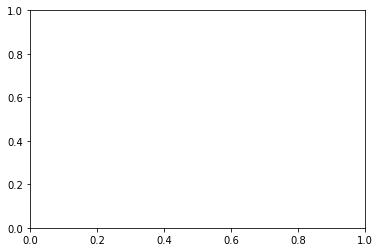

In [36]:
import matplotlib.pyplot as plt

data = {'Pos':tb_counts[0], 'Neg': tb_counts[1] }
k=list(data.keys())
v=list(data.values())

y=blob_data.shape
y1=print(y[0])
y2=[ i for i in range(0,100,10)]
#print(y2) 
y3=[20,40,60,80]

plt.bar(k,v , color ='maroon',
        width = 0.4)
 
plt.xlabel("Scores")
plt.ylabel("No. of tweets")
plt.title("Statistics of tweets")
plt.show()

We can see that we have a higher number of positive tweets in the dataset.

### Using Machine Learning Approach- Naive Bayes

In this section I have taken naive bayes model trained on a different dataset of tweets and I have applied it on my dataset. The pretrained model had a accuracy of 73% on that dataset and I have used it to predict the sentiment on our dataset.
I have modified the model to fit our dataset.

Please download the [dataset](https://www.kaggle.com/githubsearch/twitter-sentimental-analysis/data) for the below pretrained naive bayes model.

#### The code for the pretrained model:

In [13]:

tweets=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', 
                   names = ['sentiment','id','date','query','user','tweet'])
tweets

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [14]:
tweets = tweets.sample(frac=1)
tweets = tweets[:200000]
print("Dataset shape:", tweets.shape)

Dataset shape: (200000, 6)


In [15]:
tweets['sentiment']=tweets['sentiment'].replace(4,1)
tweets

,sentiment,id,date,query,user,tweet
377511,0,2051914755,Fri Jun 05 23:08:08 PDT 2009,NO_QUERY,miapfirrman,im aching in places I didn't even know I had i...
1091382,1,1969882703,Sat May 30 01:35:17 PDT 2009,NO_QUERY,ghbetbeze,@DynamiteSaint Can't disagree
1397554,1,2053982569,Sat Jun 06 06:15:01 PDT 2009,NO_QUERY,BexN12,Congrats to my amazing sister for being in lab...
647879,0,2236880442,Fri Jun 19 04:44:20 PDT 2009,NO_QUERY,T0YAH,@ryan_leslie u only staying in paris though?
319128,0,2002977969,Tue Jun 02 05:36:44 PDT 2009,NO_QUERY,FallingUpward,@snflower99 i know what you mean i want my pr...
...,...,...,...,...,...,...
1372266,1,2051236110,Fri Jun 05 21:16:14 PDT 2009,NO_QUERY,dustindikes,Just got done with the grad show. Pretty good ...
1139044,1,1976896393,Sat May 30 19:28:33 PDT 2009,NO_QUERY,TinaFaith,Finally made it!
1506716,1,2174377093,Sun Jun 14 22:25:34 PDT 2009,NO_QUERY,mojopath,#mojoquiz Hummingbird or TweetAdder? Don't kno...
1474431,1,2065731972,Sun Jun 07 09:10:54 PDT 2009,NO_QUERY,dannybrown,"@kwbridge Heathen!!! ;-) I have to admit, I wa..."


In [16]:
tweets.drop(['date','query','user'], axis=1, inplace=True)
tweets.drop('id', axis=1, inplace=True)
tweets.head(10)

,sentiment,tweet
377511,0,im aching in places I didn't even know I had i...
1091382,1,@DynamiteSaint Can't disagree
1397554,1,Congrats to my amazing sister for being in lab...
647879,0,@ryan_leslie u only staying in paris though?
319128,0,@snflower99 i know what you mean i want my pr...
1596172,1,@JeriWB You wanted to know how one cooks beans...
944638,1,@dahliamartin Haha Dahls! *hugs* I hope you're...
590192,0,@robocarrot I so get that
744054,0,Twitter was acting dumb so I had to get a new ...
965677,1,Ahhh she's making daddy proud! She'll be cente...


In [17]:
(tweets.isnull().sum() / len(tweets))*100

sentiment    0.0
tweet        0.0
dtype: float64

In [18]:
tweets['tweet'] = tweets['tweet'].astype('str')

In [19]:
positives = tweets['sentiment'][tweets.sentiment == 1 ]
negatives = tweets['sentiment'][tweets.sentiment == 0 ]

print('Total length of the data is:         {}'.format(tweets.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99924
No. of negative tagged sentences is: 100076


In [20]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 
#that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'out', 'who', "that'll", 'once', 'by', 'those', 'above', 'yourselves', 'what', 'hadn', 'theirs', 'they', "doesn't", 'with', 'to', 'below', 'shouldn', 'both', 'before', 'you', 'down', 'ain', 'myself', 'mustn', "don't", "weren't", 'same', 'in', 'ours', 'such', 'your', 'it', 'were', "isn't", 'very', 'she', 'all', 'of', 'just', 'being', 'so', 'aren', 'no', 'doesn', 'wouldn', 'his', 'these', 'between', 'this', 'o', 'hasn', 'as', 'won', "haven't", 'own', 'only', 'here', 'until', "mightn't", 'during', "wasn't", 'now', 'him', 'them', "aren't", 'few', 'too', "mustn't", 'has', 'when', "you'd", 'didn', 'not', 'how', 'their', 'about', 'more', 'after', 'ourselves', 'i', 'mightn', 'my', 'hers', 'did', "didn't", 'ma', 'wasn', 'doing', 'he', 'that', 'weren', 'if', 'further', 'then', 'than', 'couldn', 'against', 'or', "couldn't", "she's", 'an', 'at', 'there', 'have', "you're", 'where', "needn't", 'don', "wouldn't", 's', 'up', 'yourself', 'isn', "hasn't", 'why', 'yours', 'whom', 'itself', 'most', 'them

[nltk_data] Downloading package stopwords to /home/rudra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
some = 'amp,today,tomorrow,going,girl'
def process_tweets(tweet):
  # Lower Casing
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)  
    
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"yrs", "years", tweet)
    tweet = re.sub(r"hrs", "hours", tweet)
    tweet = re.sub(r"2morow|2moro", "tomorrow", tweet)
    tweet = re.sub(r"2day", "today", tweet)
    tweet = re.sub(r"4got|4gotten", "forget", tweet)
    tweet = re.sub(r"b-day|bday", "b-day", tweet)
    tweet = re.sub(r"mother's", "mother", tweet)
    tweet = re.sub(r"mom's", "mom", tweet)
    tweet = re.sub(r"dad's", "dad", tweet)
    tweet = re.sub(r"hahah|hahaha|hahahaha", "haha", tweet)
    tweet = re.sub(r"lmao|lolz|rofl", "lol", tweet)
    tweet = re.sub(r"thanx|thnx", "thanks", tweet)
    tweet = re.sub(r"goood", "good", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = re.sub(r"some1", "someone", tweet)
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #remove some words
    tweet= re.sub(some,'',tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [22]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [23]:
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)  

In [24]:
tweets['processed_tweets'] = tweets['tweet'].apply(lambda x: process_tweets(x))
tweets['processed_tweets'] = tweets['processed_tweets'].apply(lambda x: convert_abbrev_in_text(x))
print('Text Preprocessing complete.')
tweets

Text Preprocessing complete.


,sentiment,tweet,processed_tweets
377511,0,im aching in places I didn't even know I had i...,aching place even know inside lt3
1091382,1,@DynamiteSaint Can't disagree,dynamitesaint disagree
1397554,1,Congrats to my amazing sister for being in lab...,ongrats amazing sister labor day welcome ronni...
647879,0,@ryan_leslie u only staying in paris though?,ryanleslie staying paris though
319128,0,@snflower99 i know what you mean i want my pr...,snflower99 know mean want pre baby body before...
...,...,...,...
1372266,1,Just got done with the grad show. Pretty good ...,ust got done grad show pretty good outcome fac...
1139044,1,Finally made it!,inally made
1506716,1,#mojoquiz Hummingbird or TweetAdder? Don't kno...,mojoquiz hummingbird tweetadder know care gt
1474431,1,"@kwbridge Heathen!!! ;-) I have to admit, I wa...",kwbridge heathen admit pleasantly surprised


In [25]:
#removing shortwords
tweets['processed_tweets']=tweets['processed_tweets'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
tweets.head(5)

,sentiment,tweet,processed_tweets
377511,0,im aching in places I didn't even know I had i...,aching place even know inside
1091382,1,@DynamiteSaint Can't disagree,dynamitesaint disagree
1397554,1,Congrats to my amazing sister for being in lab...,ongrats amazing sister labor welcome ronnie oa...
647879,0,@ryan_leslie u only staying in paris though?,ryanleslie staying paris though
319128,0,@snflower99 i know what you mean i want my pr...,snflower99 know mean want baby body before bab...


In [26]:
!pip install sklearn
from sklearn.utils import shuffle
tweets =  shuffle(tweets).reset_index(drop=True)

In [27]:
#tokenization
tokenized_tweet=tweets['processed_tweets'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0                                         [love, help]
1    [mikasounds, killing, video, seen, absolutly, ...
2     [awful, tired, looking, forward, college, today]
3                                      [tilly15, yeah]
4                            [mileyfanfeed, following]
Name: processed_tweets, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize,max_features = 93435) ## Changed the number of max features to make it compatible
text_counts = cv.fit_transform(tweets['processed_tweets'].values.astype('U'))

In [29]:
from sklearn.model_selection import train_test_split
X=text_counts
y=tweets['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)


In [30]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.729525 0.728975 0.73745  0.73475  0.72825 ]
Train accuracy =82.22%
Test accuracy =73.01%


The above code was related to the training of the naive bayes model on a different dataset and I have changed the number of max_features to make it compatible with our dataset.

#### Prediction of the sentiments on our Dataset using the  modified pretrained model

In [31]:
token1 = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv1 = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token1.tokenize)
text_counts1 = cv1.fit_transform(my_data['Lemma'].values.astype('U'))

In [32]:
y_pred = cnb.predict(text_counts1) ##predicting the values

In [33]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [74]:
blob_data['NB_results'] = ''
for a in range(len(y_pred)):
    if y_pred[a] :
        blob_data['NB_results'][a] = 'Positive'
    else:
        blob_data['NB_results'][a] = 'Negative'

In [75]:
blob_data.head()

,tweetcaption,Lemma,Subjectivity,Polarity,Analysis,NB_results
0,Love it here vacation vibes amazing beautiful ...,Love vacation vibe amaze beautiful cabo mexi...,0.478571,0.142695,Positive,Negative
1,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone k Please vote help re...,0.445174,0.200033,Positive,Negative
2,shree Why should we have a problem with the pe...,shree problem people problem Stupid Communis...,0.638750,0.118750,Positive,Positive
3,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty Heartbreaking Post Sushant ...,0.607143,0.142857,Positive,Negative
4,We stand for Sunita Yadav Stop the Transfer Wh...,stand Sunita Yadav Stop Transfer woman empow...,0.515079,0.213228,Positive,Negative


In [76]:
blob_data.NB_results.value_counts()

Positive    24597
Negative    10669
Name: NB_results, dtype: int64

In [77]:
blob_data.Analysis.value_counts()

Positive    29591
Negative     5675
Name: Analysis, dtype: int64

In [78]:
my_data.head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged,Lemma,"(Blob_Subjectivity, Blob_polarity, Blob Analysis, NB Analysis)",Blob_Subjectivity,Blob_Polarity,Blob Analysis,NB Analysis
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,"[(Love, v), (vacation, n), (vibes, n), (amazin...",Love vacation vibe amaze beautiful cabo mexi...,,0.478571,0.142695,Positive,Negative
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,"[(Best, n), (Camera, n), (Smartphone, n), (k, ...",Best Camera Smartphone k Please vote help re...,,0.445174,0.200033,Positive,Negative
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,"[(shree, a), (problem, n), (people, n), (probl...",shree problem people problem Stupid Communis...,,0.638750,0.118750,Positive,Positive
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,"[(Rhea, n), (Chakraborty, n), (Heartbreaking, ...",Rhea Chakraborty Heartbreaking Post Sushant ...,,0.607143,0.142857,Positive,Negative
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,"[(stand, v), (Sunita, n), (Yadav, n), (Stop, n...",stand Sunita Yadav Stop Transfer woman empow...,,0.515079,0.213228,Positive,Negative


In [79]:
my_data['Blob_Subjectivity']=blob_data['Subjectivity']
my_data['Blob_Polarity']=blob_data['Polarity']
my_data['Blob Analysis']=blob_data['Analysis']
my_data['NB Analysis']=blob_data['NB_results']

In [80]:
my_data.head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged,Lemma,"(Blob_Subjectivity, Blob_polarity, Blob Analysis, NB Analysis)",Blob_Subjectivity,Blob_Polarity,Blob Analysis,NB Analysis
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,"[(Love, v), (vacation, n), (vibes, n), (amazin...",Love vacation vibe amaze beautiful cabo mexi...,,0.478571,0.142695,Positive,Negative
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,"[(Best, n), (Camera, n), (Smartphone, n), (k, ...",Best Camera Smartphone k Please vote help re...,,0.445174,0.200033,Positive,Negative
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,"[(shree, a), (problem, n), (people, n), (probl...",shree problem people problem Stupid Communis...,,0.638750,0.118750,Positive,Positive
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,"[(Rhea, n), (Chakraborty, n), (Heartbreaking, ...",Rhea Chakraborty Heartbreaking Post Sushant ...,,0.607143,0.142857,Positive,Negative
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,"[(stand, v), (Sunita, n), (Yadav, n), (Stop, n...",stand Sunita Yadav Stop Transfer woman empow...,,0.515079,0.213228,Positive,Negative


In [81]:
fin_data = my_data.drop(['cleaned_tweetcaption','POS_tagged',('Blob_Subjectivity', 'Blob_polarity', 'Blob Analysis', 'NB Analysis')],axis=1)
fin_data.head()

,Data,Date,Time,tweetcaption,Lemma,Blob_Subjectivity,Blob_Polarity,Blob Analysis,NB Analysis
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love vacation vibe amaze beautiful cabo mexi...,0.478571,0.142695,Positive,Negative
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone k Please vote help re...,0.445174,0.200033,Positive,Negative
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree problem people problem Stupid Communis...,0.638750,0.118750,Positive,Positive
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty Heartbreaking Post Sushant ...,0.607143,0.142857,Positive,Negative
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,stand Sunita Yadav Stop Transfer woman empow...,0.515079,0.213228,Positive,Negative


In [82]:
fin_data.rename(columns ={'Lemma':'Cleaned tweetcaption'},inplace=True)

In [83]:
fin_data.head()

,Data,Date,Time,tweetcaption,Cleaned tweetcaption,Blob_Subjectivity,Blob_Polarity,Blob Analysis,NB Analysis
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love vacation vibe amaze beautiful cabo mexi...,0.478571,0.142695,Positive,Negative
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone k Please vote help re...,0.445174,0.200033,Positive,Negative
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree problem people problem Stupid Communis...,0.638750,0.118750,Positive,Positive
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty Heartbreaking Post Sushant ...,0.607143,0.142857,Positive,Negative
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,stand Sunita Yadav Stop Transfer woman empow...,0.515079,0.213228,Positive,Negative


In [85]:
print(fin_data['NB Analysis'].value_counts())
print(fin_data['Blob Analysis'].value_counts())

Positive    24597
Negative    10669
Name: NB Analysis, dtype: int64
Positive    29591
Negative     5675
Name: Blob Analysis, dtype: int64


##### We can observe finally that in TextBlob application the number of positive tweets is more than the number of negative tweets